# RDKit

`RDKit` is an open-source software toolkit for cheminformatics, designed to assist in the analysis and design of small molecules and chemical compounds. It provides a set of libraries and tools for the manipulation and analysis of molecular structures, molecular descriptors, molecular fingerprints, molecular similarity, molecular visualization, and more. The toolkit is widely used in academia, as well as in the pharmaceutical, biotech, and chemical industries for a variety of tasks such as virtual screening, lead optimization, and chemical database management.dd

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

import pubchempy as pcp

def smiles_from_name(name):
    results = pcp.get_compounds(name, 'name')
    for compound in results:
        return compound.canonical_smiles

# SMILES

`SMILES` (Simplified Molecular Input Line Entry System) is a line notation representation of molecular structures. It is a way of representing chemical compounds as strings of characters, which can be easily processed and analyzed by computer algorithms.

Each `SMILES` string consists of symbols that represent the elements in the molecule, as well as brackets and other characters that describe the bonding between the atoms. For example, the SMILES string for ethanol (C2H5OH) would be CCO. In SMILES, each carbon atom is represented by the letter "C", each hydrogen atom by the letter "H", and each oxygen atom by the letter "O". The bonding between the atoms is indicated by the arrangement of the characters in the string.

`SMILES` is widely used in cheminformatics and computational chemistry, as it provides a compact and standardized way of representing molecular structures in a machine-readable form. This makes it possible to compare and analyze large numbers of chemical compounds, as well as to generate predictions about their properties and behavior.

In [3]:
kegg_df = pd.read_csv('../data/compounds_final.csv', index_col=0)
kegg_df = kegg_df[['Entry', 'Names', 'Formula', 'SMILES']]
kegg_df[kegg_df['Entry'] == 'C07481']

,Entry,Names,Formula,SMILES
4038,C07481,"[""Caffeine"", ""1,3,7-Trimethylxanthine""]",C8H10N4O2,Cn1c(=O)c2c(ncn2C)n(C)c1=O


CN1C=NC2=C1C(=O)N(C(=O)N2C)C


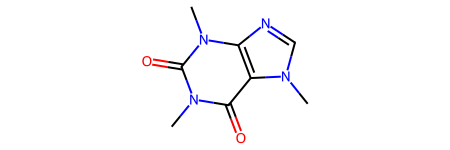

In [4]:
# Find SMILES of caffeine
caffeine_smiles = smiles_from_name('caffeine')
print(caffeine_smiles)

caffeine = Chem.MolFromSmiles(caffeine_smiles)
caffeine

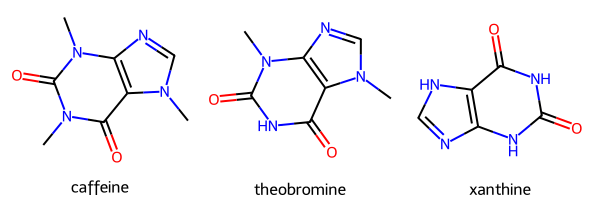

In [5]:
theobromine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)NC(=O)N2C') # insert SMILES
xanthine = Chem.MolFromSmiles('C1=NC2=C(N1)C(=O)NC(=O)N2') #insert SMILES


mols = [caffeine, theobromine, xanthine] #create a list containing the 3 mol objects we have created
names = ['caffeine', 'theobromine', 'xanthine'] #create a list containing the names of the 3 molecules

#Now we create the GridImage
grid = Draw.MolsToGridImage(mols, legends=names) #pass the 'mols' list here and create the image
grid

## Canonicalization

Although SMILES are very useful to handle molecules, they are not unique, which means that different SMILES can represent the same molecule. In the example below, we use three different SMILES that map to the same molecule.

As you see, although we have introduced 3 different SMILES, we are referring to the same molecule. To avoid this, we can apply `canonicalization`. This concept refers to the generation of a unique SMILES for each molecule.


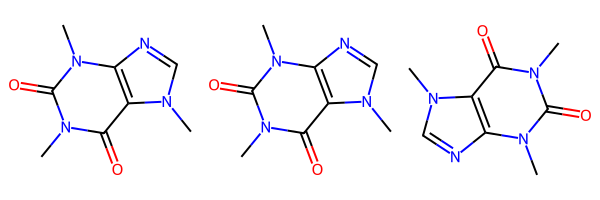

In [6]:
caffeine1 = caffeine_smiles #insert your original smiles
caffeine2 = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
caffeine3 = 'Cn1c(=O)c2c(ncn2C)n(C)c1=O'

#Create a list of SMILES
smiles_list = [caffeine1, caffeine2, caffeine3]

#Create mols from smiles
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

#Visualize mols
Draw.MolsToGridImage(mols)

In [7]:
print(smiles_list)

['CN1C=NC2=C1C(=O)N(C(=O)N2C)C', 'Cn1cnc2c1c(=O)n(C)c(=O)n2C', 'Cn1c(=O)c2c(ncn2C)n(C)c1=O']


In [8]:
def canonicalize_smiles(smiles):
    '''This function takes a non-canonical SMILES and
    returns the canonical version'''
        
    mol = Chem.MolFromSmiles(smiles) #create a mol object from input smiles 

    canonical_smiles = Chem.MolToSmiles(mol) #convert the previous mol object to SMILES using Chem.MolToSmiles()

    return canonical_smiles

#create a new list by applying your function to list of non-canonical SMILES
canonical_smiles = [canonicalize_smiles(smiles) for smiles in smiles_list]

print('Original caffeine smile:', caffeine_smiles)
#check new list
for smiles in canonical_smiles:
    print(smiles)

Original caffeine smile: CN1C=NC2=C1C(=O)N(C(=O)N2C)C
Cn1c(=O)c2c(ncn2C)n(C)c1=O
Cn1c(=O)c2c(ncn2C)n(C)c1=O
Cn1c(=O)c2c(ncn2C)n(C)c1=O


## Fingerprints

ML algorithms usually take vectors (or tensors) as inputs and operate with them. However, we are dealing with molecules. How can we transform molecules into numbers to feed our ML algorithms?

One common option is using molecular fingerprints. Molecular fingerprints are vectors that describe molecules as bit arrays (arrays of 1s and 0s). By using fingerprints, we can encode our structures and operate with them. There are many fingeprints available, but here we will use the Morgan Fingerprint.


In [9]:
from rdkit.Chem import AllChem
import numpy as np

#We use the GetMorganFingerprintAsBitVect to create the fingerprint 
caffeine_fp = AllChem.GetMorganFingerprintAsBitVect(caffeine, 2, nBits=1024) #2 means radius=2 and nBits is the number of bits (lenght) of the fp

print(caffeine_fp.GetNumBits()) #print vector length

caffeine_fp.ToList() #visualize vector as list

1024


[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Molecular similarity using Tanimoto distance

We will see how we can extract chemical information using fingerprints and Tanimoto similarity. Tanimoto similarity measures how similar two fingerprints are. We can use this metric to compare groups of molecules and decide which ones are chemically similar (intuitively, which molecules share more common substructures).

As an example, you have to create the Morgan fingerprints (r=2, nBits=1024) of toluene and theobromine, and then use the Tanimoto similarity to decide which one is more similar to caffeine. Tanimoto similarity quantifies how many bits two binary vectors have in common.


Caffeine-toluene similarity: 0.094
Caffeine-theobromine similarity: 0.515


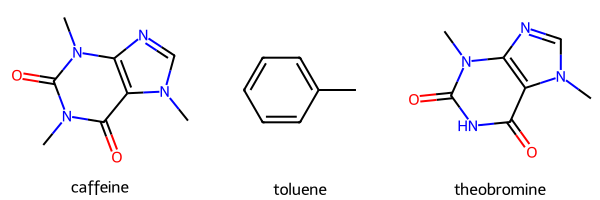

In [16]:
from rdkit.DataStructs import FingerprintSimilarity

toluene = Chem.MolFromSmiles('c1ccccc1C') #insert toluene SMILES

#Now, create the fingerprints of theobromine and toluene
toluene_fp = AllChem.GetMorganFingerprintAsBitVect(toluene, 2, nBits=1024) #insert corresponding values
theobromine_fpb =  AllChem.GetMorganFingerprintAsBitVect(theobromine, 2, nBits=1024) #same for theobromine

#Now we calculate Tanimoto Similarity
sim1 = FingerprintSimilarity(caffeine_fp, toluene_fp) #insert fingerprints to compare
sim2 = FingerprintSimilarity(caffeine_fp, theobromine_fp) #same than before

#We can now print each similarity 
print(f'Caffeine-toluene similarity: {round(sim1, 3)}'.format())
print(f'Caffeine-theobromine similarity: {round(sim2, 3)}')

mols = [caffeine, toluene, theobromine] #create a list containing the 3 mol objects we have created
names = ['caffeine', 'toluene', 'theobromine'] #create a list containing the names of the 3 molecules

#Now we create the GridImage
grid = Draw.MolsToGridImage(mols, legends=names) #pass the 'mols' list here and create the image
grid

## Bemis-Murcko Scaffold

It is possible to decompose molecule into basic scaffolds or core molecular motifs. A common method is the Bemis-Murcko decomposition. This method returns a simplified framework of a molecule that can be useful to compare or group different types of substances. Bemis-Murcko scaffolds can be easily obtained in rdkit.


We can compare caffeine and theobromine scaffolds to realize these molecules are very similar

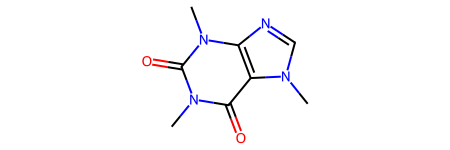

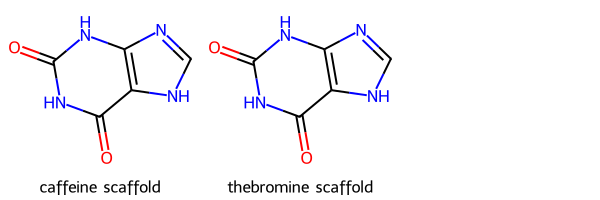

In [18]:
from rdkit.Chem.Scaffolds import MurckoScaffold

#Get Murcko Scaffold from a mol object
caff_scaffold = MurckoScaffold.GetScaffoldForMol(caffeine)

#Show original molecule
display(caffeine)

#compute theobromine scaffold
theobr_scaffold = MurckoScaffold.GetScaffoldForMol(theobromine)

#draw both scaffolds as a GridImage
Draw.MolsToGridImage([caff_scaffold, theobr_scaffold], legends=['caffeine scaffold', 'thebromine scaffold'])